In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df=sns.load_dataset('titanic')

In [20]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [21]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
df['age'] = df['age'].fillna(np.mean(df['age']))
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [23]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [24]:
dummy_df=pd.get_dummies(df['deck'])
dummy_df

,A,B,C,D,E,F,G
0,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
886,False,False,True,False,False,False,False
887,False,True,False,False,False,False,False
888,False,False,True,False,False,False,False
889,False,False,True,False,False,False,False


<Axes: xlabel='sex', ylabel='age'>

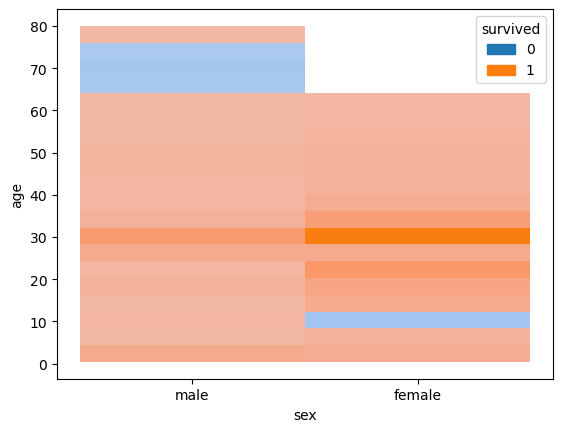

In [25]:
sns.histplot(x='sex',y='age',data=df,bins=20,hue='survived')

<Axes: xlabel='sex', ylabel='age'>

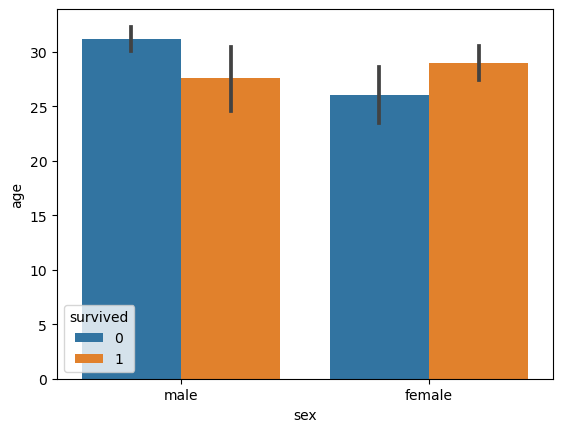

In [26]:
sns.barplot(x='sex',y='age',data=df,hue='survived')

C:\Users\PRIYA\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PRIYA\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

C:\Users\PRIYA\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PRIYA\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PRIYA\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


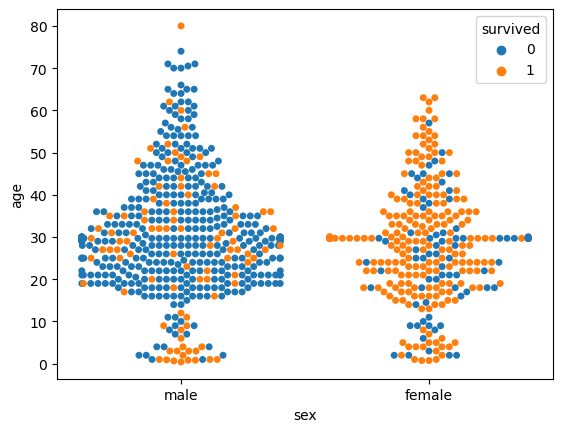

In [27]:
sns.swarmplot(x='sex',y='age',data=df,hue='survived')

<Axes: xlabel='sex', ylabel='age'>

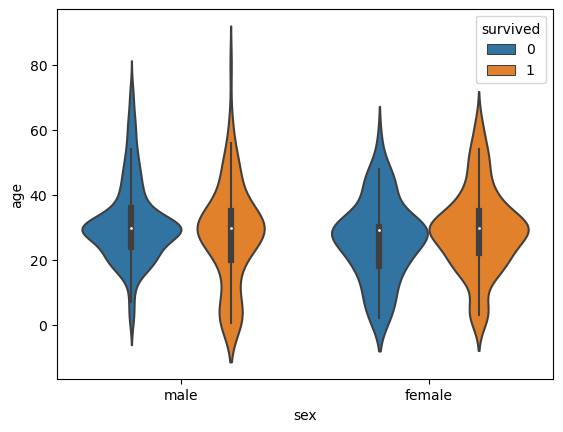

In [28]:
sns.violinplot(x='sex',y='age',data=df,hue='survived')

<Axes: xlabel='sex', ylabel='age'>

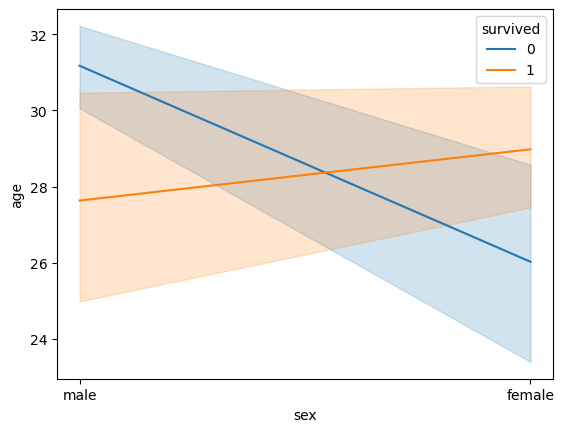

In [29]:
sns.lineplot(x='sex',y='age',data=df,hue='survived')

<Axes: xlabel='sex', ylabel='age'>

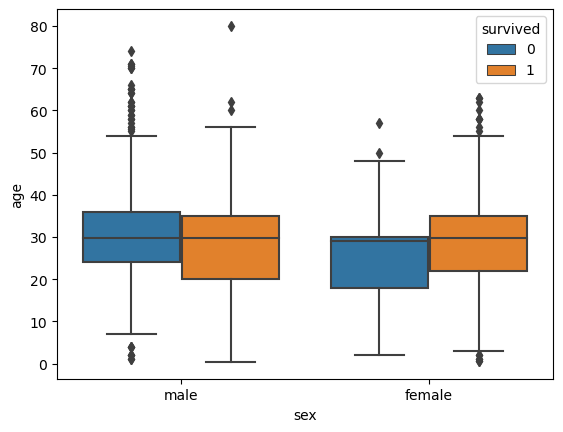

In [30]:
sns.boxplot(x='sex',y='age',data=df,hue='survived')

<Axes: xlabel='sex', ylabel='age'>

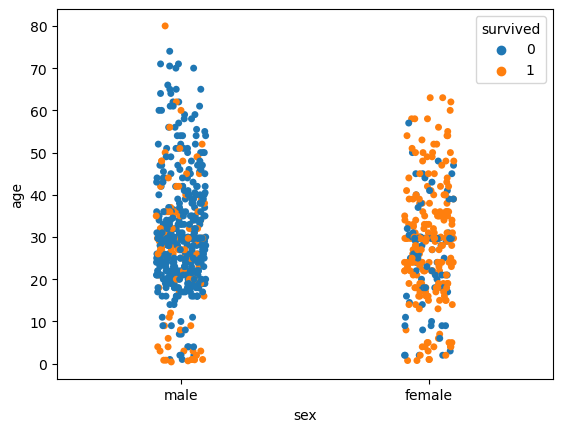

In [31]:
sns.stripplot(x='sex',y='age',data=df,hue='survived')

survived       int64
pclass         int64
age          float64
sibsp          int64
parch          int64
fare         float64
deck        category
dtype: object


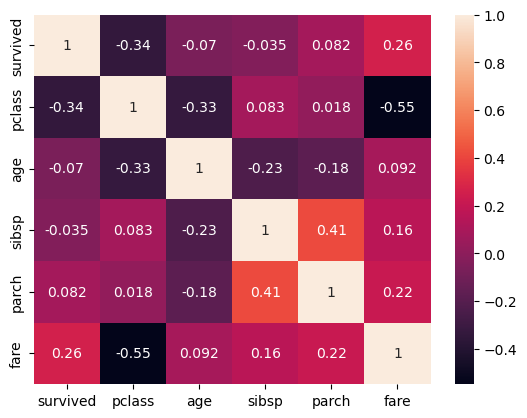

In [32]:
import pandas as pd

h1 =df.drop(columns=["sex","embarked","class","who","adult_male","embark_town","alive","alone"])
h1
# Check the data types of columns in the DataFrame
print(h1.dtypes)

# Drop non-numeric columns
h1_numeric = h1.select_dtypes(include=['number'])

# Calculate correlation matrix
corr = h1_numeric.corr()

# Plot heatmap
import seaborn as sns
sns.heatmap(corr, annot=True)
plt.show()
